In [23]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
from targets import Target, ConditionalTarget
from models import AdversarialDensityEstimator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


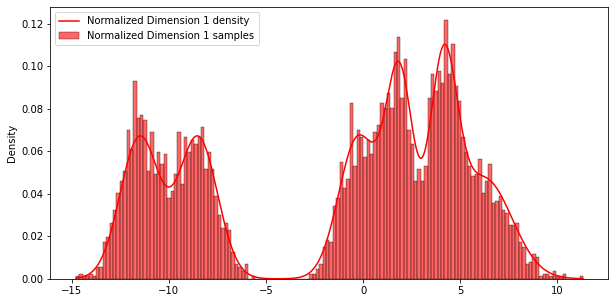

In [24]:
example =  "Normalized Dimension 1"
num_samples = 10000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.64it/s, loss = 1.1185994148254395]


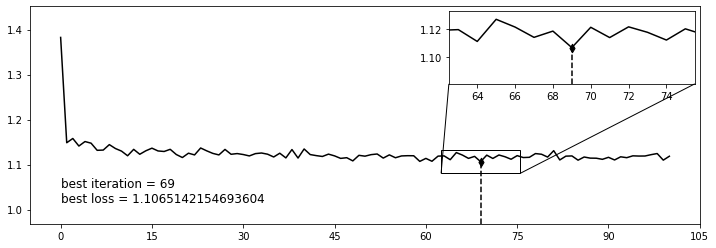

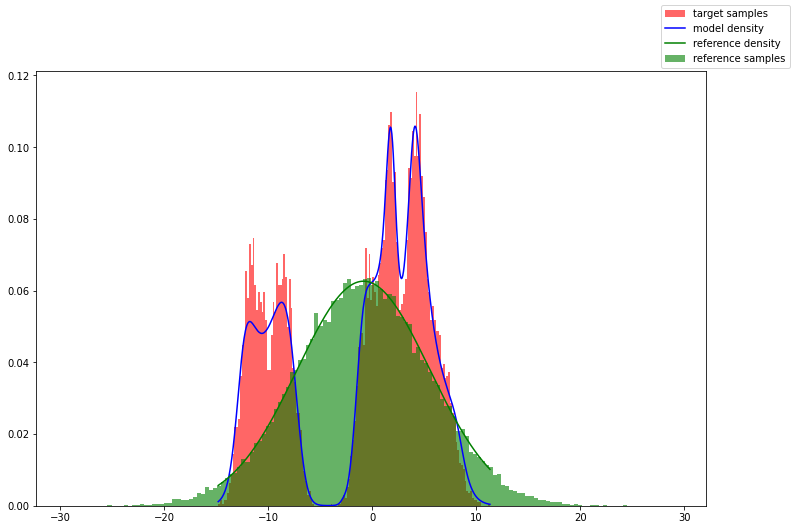

In [26]:
epochs = 100
batch_size = int(num_samples/50)
hidden_dims = [64,64,64]
ADE = AdversarialDensityEstimator(target_samples,hidden_dims)
ADE.train(epochs, batch_size)
ADE.model_visual()

(array([  2.,   0.,   2.,   2.,   1.,   2.,   9.,   3.,   8.,   4.,   8.,
         13.,  14.,  18.,  15.,  21.,  19.,  33.,  35.,  53.,  42.,  57.,
         71.,  78.,  80.,  99., 110., 115., 141., 144., 179., 190., 219.,
        188., 218., 227., 293., 260., 260., 273., 320., 281., 336., 310.,
        289., 308., 303., 299., 287., 279., 282., 285., 279., 255., 245.,
        234., 215., 178., 172., 161., 147., 125., 119., 114.,  96.,  88.,
         70.,  60.,  59.,  55.,  50.,  35.,  35.,  23.,  20.,  19.,  11.,
         18.,   5.,   4.,   3.,   3.,   2.,   1.,   3.,   0.,   2.,   3.,
          1.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([-24.922752  , -24.393337  , -23.863922  , -23.334509  ,
        -22.805094  , -22.275679  , -21.746264  , -21.21685   ,
        -20.687435  , -20.15802   , -19.628605  , -19.099192  ,
        -18.569777  , -18.040361  , -17.510946  , -16.981533  ,
        -16.452118  , -15.922703  , -15.393289  , -14.8638735 

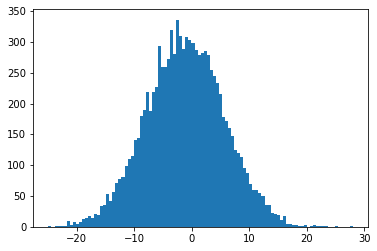

In [28]:
import matplotlib.pyplot as plt
plt.hist(ndre.reference.sample([10000]).cpu().detach().numpy(), bins = 100)

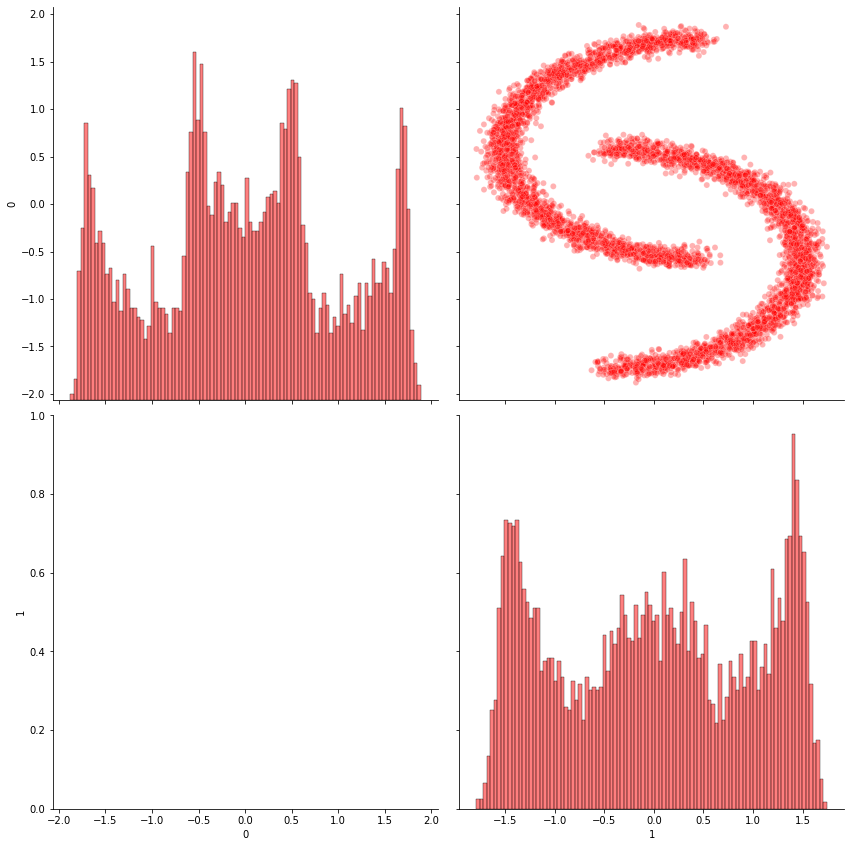

In [29]:
example =  "Moons"
num_samples = 10000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:31<00:00,  1.57it/s, loss = 0.8596944212913513]


tensor(-2.5010, grad_fn=<MinBackward1>)


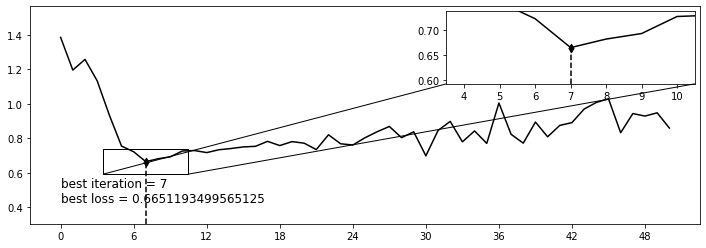

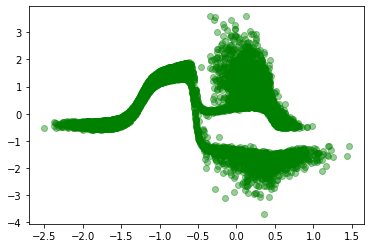

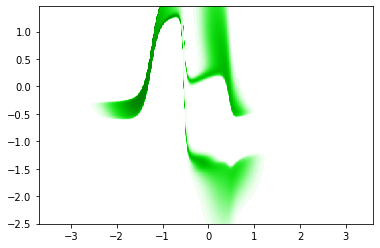

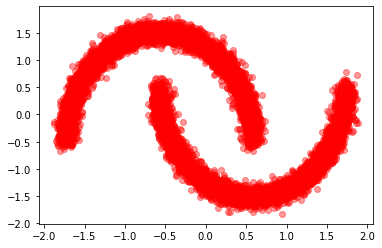

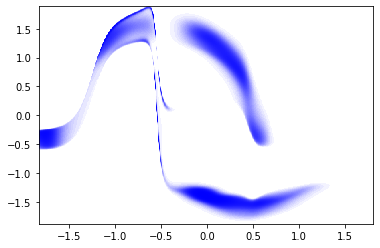

In [40]:
epochs = 50
batch_size = int(num_samples/100)
hidden_dims = [64,64,64]
ndre = AdversarialDensityEstimator(target_samples,hidden_dims)
ndre.train(epochs, batch_size)
ndre.model_visual()

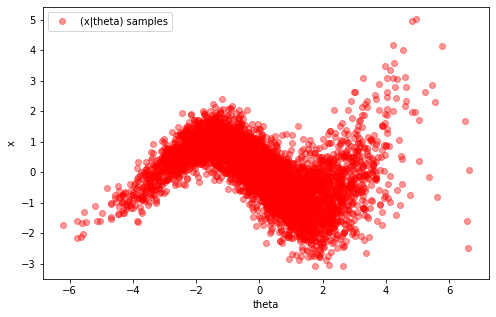

In [6]:
example =  "Gaussian Field"
num_samples = 50000
target = ConditionalTarget(example, num_samples)
x_samples , theta_samples, theta_prior, simulator = target.get_target()
target.target_visual()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:48<00:00,  2.05it/s, loss = 1.1153285503387451]


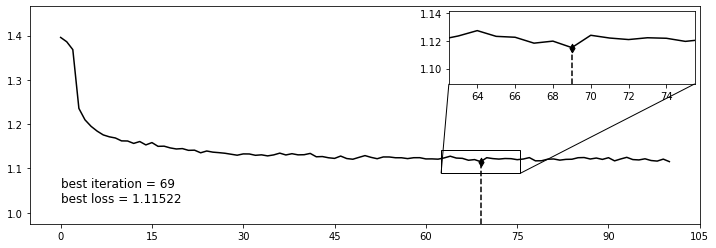

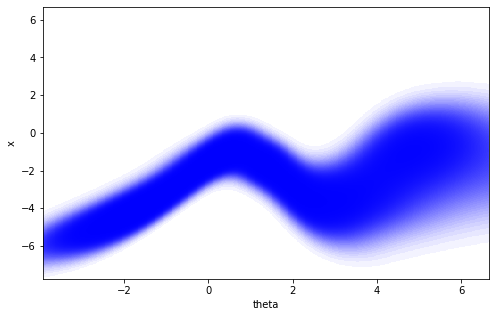

In [7]:
cnrde= CNDRE(x_samples, theta_samples,hidden_dims = [64,64,64], mode = 'Proxy')
cnrde.train(100,500)
cnrde.model_visual()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:47<00:00,  2.11it/s, loss = 1.1253712177276611]


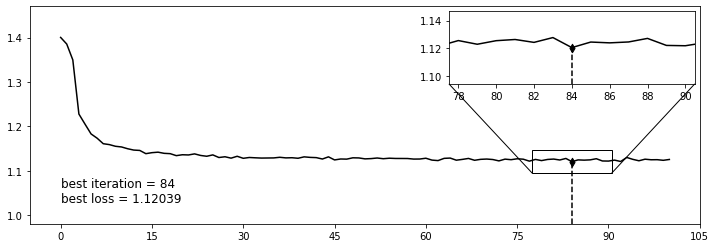

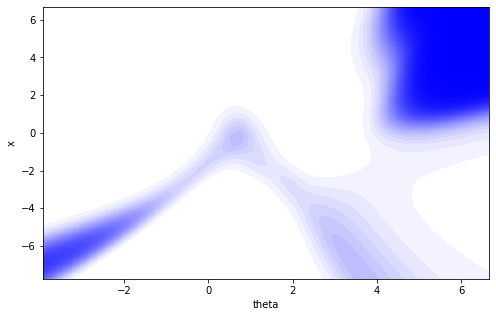

In [8]:
cnrde= CNDRE(x_samples, theta_samples,hidden_dims = [64,64,64], mode = 'Ratio')
cnrde.train(100,500)
cnrde.model_visual()